In [1]:
import requests
import json
import pandas as pd
import csv
import datetime
import dateutil.parser
import unicodedata

#This module provides regular expressions
import re

In [2]:
# Reads dataset file
df = pd.read_csv('Data_Set_Student_Reviews.csv', header = None, encoding='utf-8')

# Changes header title
df.columns=['Text']

df

Text
0    1.                 Before uploading the video ...
1    2.                Before, she is kind to her s...
2    3.                Can be improved. Hope she co...
3    4.                For this subject, some topic...
4                5.                Give more examples.
..                                                 ...
848  846.       The professor was active in google ...
849   847.        Very nice and accommodating teacher!
850  848.       Words  can''t express how i am grat...
851  849.       in my opinion, the instructor''s wa...
852  850.        please speak tagalog when teaching...

[853 rows x 1 columns]

In [3]:
# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = text.lower()
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = re.sub('httpS+s*', ' ',text)  # remove URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#S+', '', text)  # remove hashtags
    text = re.sub('@S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7F]+',r' ', text) # replace non-ASCII characters
    text = re.sub('\s\s+', ' ', text)  # remove extra whitespace
    return text

# Cleaning the text in the Text column
df['Cleaned_Text'] = df['Text'].apply(clean)
df

Text  \
0    1.                 Before uploading the video ...   
1    2.                Before, she is kind to her s...   
2    3.                Can be improved. Hope she co...   
3    4.                For this subject, some topic...   
4                5.                Give more examples.   
..                                                 ...   
848  846.       The professor was active in google ...   
849   847.        Very nice and accommodating teacher!   
850  848.       Words  can''t express how i am grat...   
851  849.       in my opinion, the instructor''s wa...   
852  850.        please speak tagalog when teaching...   

                                          Cleaned_Text  
0     before uploading the video discussion i sugge...  
1     before she is kind to her students my classma...  
2     can be improved hope she considers personal n...  
3     for this subject some topics are not easy but...  
4                                  give more examples   
..                                                 ...  
848   the professor was active in google meets spec...  
849                very nice and a ommodating teacher   
850   words can t express how i am grateful with ou...  
851   in my opinion the instructor s way of encoura...  
852          please speak tagalog when teaching please  

[853 rows x 2 columns]

In [4]:
df.loc[0, 'Text']

'1.\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 Before uploading the video discussion, I suggest that she discuss it clearly and remove the errors because it can confuse our Course 1  class.'

In [5]:
df.loc[0, 'Cleaned_Text']

' before uploading the video discussion i suggest that she discuss it clearly and remove the errors because it can confuse our course class '

In [6]:
# Sorts Text column
df.sort_values('Text', inplace = True)

# Counts numbers of duplicates
duplicates = df.pivot_table(columns=['Text'], aggfunc='size')
duplicates

Text
-                   She didn''t release our grades from prelims to midterms."                                                                                                                                                                                                                                                                                                                                                                                                             1
-                   Titus 2:7-8"                                                                                                                                                                                                                                                                                                                                                                                                                                                          1
-                   she only reads the modu

In [7]:
# Drops all duplicate values 
df.drop_duplicates(subset ="Text",keep = False, inplace = True)
df

Text  \
170  -                   She didn''t release our gr...   
49                    -                   Titus 2:7-8"   
311  -                   she only reads the module ...   
0    1.                 Before uploading the video ...   
9    10.             I appreciate the faculty conce...   
..                                                 ...   
95   95.            Activities are timed which is o...   
96   96.           At first, I liked my professor b...   
97   97.            Doesn''t conduct classes, but p...   
98                        98.           Excellent prof   
99   99.           For the duration of this semeste...   

                                          Cleaned_Text  
170   she didn t release our grades from prelims to...  
49                                              titus   
311   she only reads the module when she is having ...  
0     before uploading the video discussion i sugge...  
9     i appreciate the faculty concerned in this su...  
..                                                 ...  
95    activities are timed which is okay but someti...  
96    at first i liked my professor because she is ...  
97         doesn t conduct classes but post activities  
98                                      excellent prof  
99    for the duration of this semester she never d...  

[853 rows x 2 columns]

In [8]:
#check for null values in dataset
df.isnull().values.any()

False

In [9]:
#set english stopwords
import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
stop_words_en=set(stopwords)
print(stop_words_en)

{'when', "you'd", 'at', 'should', 'yourselves', 'isn', 'had', 'off', 'theirs', 'each', 'd', 'hasn', 'be', 'weren', 'him', 'did', 'once', 'needn', "mustn't", 'between', 'whom', "hadn't", 'again', "won't", 'but', 'couldn', 'other', 'll', 'over', 'how', "don't", 'below', "haven't", "doesn't", 'her', 'does', "wouldn't", 'above', "needn't", 'wasn', 'into', 'ma', 'with', "aren't", 'before', 'nor', 'on', 'there', 'few', 'by', 'most', 'further', 'won', 'didn', 'or', 'both', 'very', 'm', 'yourself', 'which', "you'll", 'in', 'through', "isn't", 'being', "mightn't", 'such', "shouldn't", 'doesn', 'those', 'themselves', 'hers', 'do', 'myself', 'your', "weren't", 'his', 'out', 'he', 'their', "you're", 'she', 'to', 'my', 'down', 'than', 'here', 'just', 'will', 's', 'have', "should've", 'me', 'under', 'own', 'any', 'has', 'up', 'a', 'hadn', 'shan', "didn't", 'an', 'it', 'who', 'o', 'himself', 'all', "you've", 'where', 'am', 'as', 'you', 'not', 'herself', 'y', 'aren', 'after', 'same', 'were', 'been', '

In [10]:
#removing english and tagalog stopwords
from nltk.tokenize import word_tokenize

def removing_en_stopwords(text):
    tokens = word_tokenize(text)
    text = [word for word in tokens if not word
in stop_words_en]
    return text
df['removed_stopwords'] = df.Cleaned_Text.apply(lambda x: removing_en_stopwords(x))
df

Text  \
170  -                   She didn''t release our gr...   
49                    -                   Titus 2:7-8"   
311  -                   she only reads the module ...   
0    1.                 Before uploading the video ...   
9    10.             I appreciate the faculty conce...   
..                                                 ...   
95   95.            Activities are timed which is o...   
96   96.           At first, I liked my professor b...   
97   97.            Doesn''t conduct classes, but p...   
98                        98.           Excellent prof   
99   99.           For the duration of this semeste...   

                                          Cleaned_Text  \
170   she didn t release our grades from prelims to...   
49                                              titus    
311   she only reads the module when she is having ...   
0     before uploading the video discussion i sugge...   
9     i appreciate the faculty concerned in this su...   
..                                                 ...   
95    activities are timed which is okay but someti...   
96    at first i liked my professor because she is ...   
97         doesn t conduct classes but post activities   
98                                      excellent prof   
99    for the duration of this semester she never d...   

                                     removed_stopwords  
170               [release, grades, prelims, midterms]  
49                                             [titus]  
311  [reads, module, class, explanations, students,...  
0    [uploading, video, discussion, suggest, discus...  
9    [appreciate, faculty, concerned, subject, effo...  
..                                                 ...  
95   [activities, timed, okay, sometimes, frustrati...  
96   [first, liked, professor, strict, learned, muc...  
97                [conduct, classes, post, activities]  
98                                   [excellent, prof]  
99   [duration, semester, never, discussed, lessons...  

[853 rows x 3 columns]

Data Exploration

In [11]:
#Convert list to String
df2 = pd.DataFrame(columns=['removed_stopwords'])
def listToString(s): 
    str1 = ""
    for ele in s:
        str1 = str1 + " " + ele
    return str1
df2['cleaned_texts'] = df.removed_stopwords.apply(lambda x:listToString(x))

In [12]:
#Export dataframe for manual clssification and rule based classification
df2.to_csv('sentimentAnalysis_en.csv')
del df2['removed_stopwords']
df2

cleaned_texts
170                    release grades prelims midterms
49                                               titus
311   reads module class explanations students gift...
0     uploading video discussion suggest discuss cl...
9     appreciate faculty concerned subject efforts ...
..                                                 ...
95    activities timed okay sometimes frustrating e...
96    first liked professor strict learned much dis...
97                     conduct classes post activities
98                                      excellent prof
99    duration semester never discussed lessons eve...

[853 rows x 1 columns]

In [13]:
# Sorts Text column
df2.sort_values('cleaned_texts', inplace=True, ascending = True)
df2.head(40)

cleaned_texts
532                                                   
816                                                   
631                                                   
272                                                   
59                                                    
273                                                   
822                                                   
444                                                   
176                                                   
550                                                   
746                                                   
139                                                   
459                                                   
533                                                   
145                                                   
461                                                   
113                                                   
503                                                   
462                                                   
534                                                   
79                                                    
105                                                   
539                                                   
107                                                   
421                       academic knowledge excellent
271    act like mother line naman grades nyo eh hehehe
504                            active google classroom
463   activities difficult learning materials diffi...
42    activities doable recorded lectures detailed ...
234   activities given taken internet thus form pla...
201   activities really tiring fact exceeds time sp...
95    activities timed okay sometimes frustrating e...
608   actually instructor oblicdon enrolled subject...
325   adequate knowledge subject suggest step teach...
117   admire ms teacher knowledgeable also consider...
50    advanced ounting difficult course lessons wou...
713   agree mam itax part gen ed filipinos knowledg...
729   also possess positive awra makes easy us stud...
766   although subject challenging teacher made bea...
712   although subject really hard sometimes shown ...

In [14]:
# Replaces empty string rows with NaN vallues
nan_value = float("NaN")
df2['cleaned_texts'].replace("", nan_value, inplace=True)

# Drops NaN Values
df2.dropna(subset = ["cleaned_texts"], inplace=True)
df2

cleaned_texts
421                       academic knowledge excellent
271    act like mother line naman grades nyo eh hehehe
504                            active google classroom
463   activities difficult learning materials diffi...
42    activities doable recorded lectures detailed ...
..                                                 ...
248                             wish synchronous meets
474    withdrawed class beginning semester please mind
850                   words express grateful professor
475   would better teacher first discuss lessons gi...
221   would often post assignments midnight underst...

[829 rows x 1 columns]

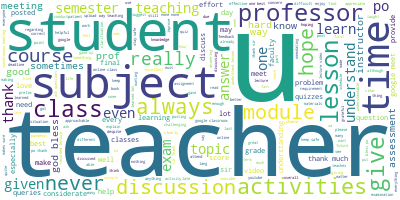

In [15]:
#word cloud
from wordcloud import WordCloud
long_string = ','.join(list(df2['cleaned_texts'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl  

In [17]:
# Adds a column which adds the length of each phrases
df2['Length'] = df2['cleaned_texts'].apply(len)
df2

cleaned_texts  Length
421                       academic knowledge excellent      29
271    act like mother line naman grades nyo eh hehehe      48
504                            active google classroom      24
463   activities difficult learning materials diffi...     302
42    activities doable recorded lectures detailed ...     183
..                                                 ...     ...
248                             wish synchronous meets      23
474    withdrawed class beginning semester please mind      48
850                   words express grateful professor      33
475   would better teacher first discuss lessons gi...      61
221   would often post assignments midnight underst...     307

[829 rows x 2 columns]

In [18]:
# Plots the frquency of Phrases
df2['Length'].plot(kind = 'hist' , bins = 50)

<AxesSubplot:ylabel='Frequency'>